In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\dhruv\Internship\Task_3\archive\Customers.csv"
data = pd.read_csv(file_path)
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
data.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
age = data.iloc[:, [2]]
age

,Age
0,19
1,21
2,20
3,23
4,31
...,...
1995,71
1996,91
1997,87
1998,77


In [6]:
scaler = StandardScaler().fit(age)
print(scaler)

StandardScaler()


In [7]:
scaler_age = StandardScaler().fit_transform(age)
scaler_age

array([[-1.05408932],
       [-0.98372287],
       [-1.0189061 ],
       ...,
       [ 1.33836975],
       [ 0.98653753],
       [ 1.44391941]])

In [8]:
annual_income = data.iloc[:, [3]]
annual_income

,Annual Income ($)
0,15000
1,35000
2,86000
3,59000
4,38000
...,...
1995,184387
1996,73158
1997,90961
1998,182109


In [9]:
scaler_annual_income = StandardScaler().fit_transform(annual_income)
scaler_annual_income

array([[-2.09350095],
       [-1.65613312],
       [-0.54084515],
       ...,
       [-0.43235606],
       [ 1.56090408],
       [-0.00266404]])

In [10]:
spending_pwr = data.iloc[:, [4]]
spending_pwr

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40
...,...
1995,40
1996,32
1997,14
1998,4


In [11]:
scaler_spending_pwr = StandardScaler().fit_transform(spending_pwr)
scaler_spending_pwr

array([[-0.42833854],
       [ 1.07554599],
       [-1.6099621 ],
       ...,
       [-1.3235079 ],
       [-1.68157565],
       [ 0.03714953]])

In [12]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = None)
    kmeans.fit(scaler_spending_pwr)
    wcss.append(kmeans.inertia_)
print("Different values of WCSS")
print(wcss)


Different values of WCSS
[1999.9999999999989, 553.3347589208489, 222.2213767732955, 136.1032194095351, 88.0914119776883, 59.64972815085969, 46.10752952741359, 33.876636691278954, 25.969728725725908, 21.299127792580997]


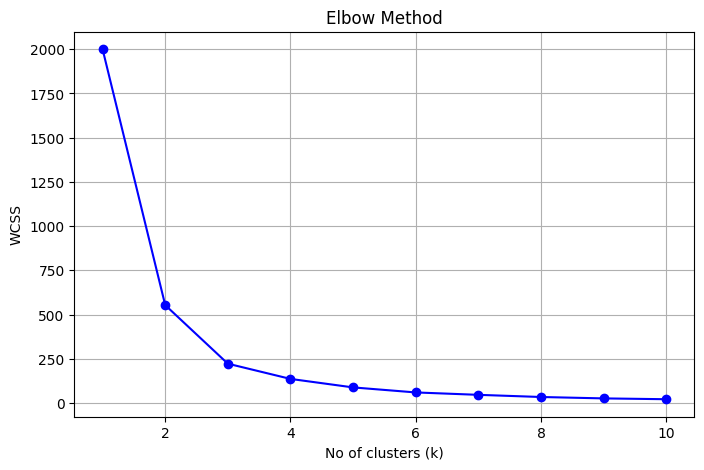

In [13]:
plt.figure(figsize = (8, 5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-', color = 'blue')
plt.title("Elbow Method")
plt.xlabel("No of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [14]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [15]:
new_data = data.drop(columns = 'Profession')
new_data['Gender'] = new_data['Gender'].map({'Male': 0, 'Female': 1})
new_data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,0,19,15000,39,1,4
1,2,0,21,35000,81,3,3
2,3,1,20,86000,6,1,1
3,4,1,23,59000,77,0,2
4,5,1,31,38000,40,2,6
...,...,...,...,...,...,...,...
1995,1996,1,71,184387,40,8,7
1996,1997,1,91,73158,32,7,7
1997,1998,0,87,90961,14,9,2
1998,1999,0,77,182109,4,7,2


In [16]:
scaled_data = StandardScaler().fit_transform(new_data)
scaled_data

array([[-1.731185  , -1.20706357, -1.05408932, ..., -0.42833854,
        -0.79120713,  0.11749744],
       [-1.72945295, -1.20706357, -0.98372287, ...,  1.07554599,
        -0.28116224, -0.39005088],
       [-1.7277209 ,  0.82845678, -1.0189061 , ..., -1.6099621 ,
        -0.79120713, -1.40514752],
       ...,
       [ 1.7277209 , -1.20706357,  1.33836975, ..., -1.3235079 ,
         1.24897242, -0.8975992 ],
       [ 1.72945295, -1.20706357,  0.98653753, ..., -1.68157565,
         0.73892753, -0.8975992 ],
       [ 1.731185  , -1.20706357,  1.44391941, ...,  0.03714953,
         0.22888264, -0.8975992 ]])

In [17]:
print(data['Annual Income ($)'].describe())

count      2000.000000
mean     110731.821500
std       45739.536688
min           0.000000
25%       74572.000000
50%      110045.000000
75%      149092.750000
max      189974.000000
Name: Annual Income ($), dtype: float64


In [18]:
print(data['Spending Score (1-100)'].describe())

count    2000.000000
mean       50.962500
std        27.934661
min         0.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: Spending Score (1-100), dtype: float64


In [19]:
print(data['Age'].describe())

count    2000.000000
mean       48.960000
std        28.429747
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64


In [20]:
kmeans = KMeans(n_clusters = 3, random_state= None)
new_data['Cluster'] = kmeans.fit_predict(scaled_data)
new_data[['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Cluster']].tail(10)

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Cluster
1990,1,30,166983,69,7,3,0
1991,1,97,129444,96,5,6,0
1992,0,94,181183,24,9,3,2
1993,1,64,175254,100,9,5,0
1994,1,19,54121,89,6,3,0
1995,1,71,184387,40,8,7,0
1996,1,91,73158,32,7,7,0
1997,0,87,90961,14,9,2,2
1998,0,77,182109,4,7,2,2
1999,0,90,110610,52,5,2,2


In [21]:
from sklearn.metrics import silhouette_score

score = silhouette_score(new_data, new_data['Cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.02


In [22]:
from sklearn.decomposition import PCA
import seaborn as sns

In [23]:
pca = PCA(n_components = 3)
pca_components = pca.fit_transform(new_data)

new_data['PCA1'] = pca_components[:, 1]
new_data['PCA2'] = pca_components[:, 2]


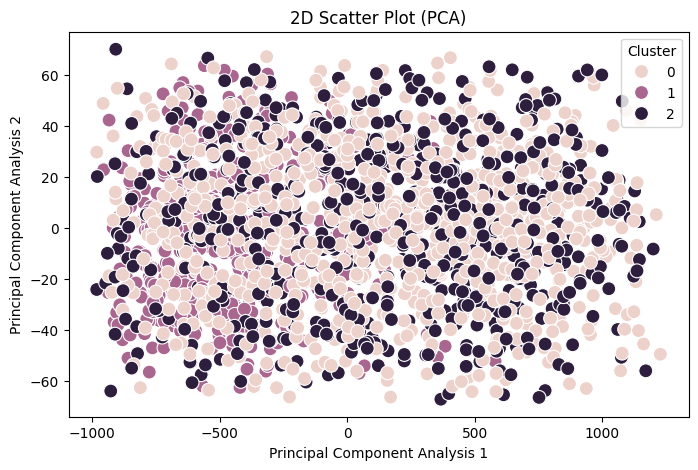

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x= 'PCA1', y= 'PCA2', hue = 'Cluster',data = new_data, s = 100)
plt.title("2D Scatter Plot (PCA)")
plt.xlabel("Principal Component Analysis 1")
plt.ylabel("Principal Component Analysis 2")
plt.show()

<Figure size 800x500 with 0 Axes>

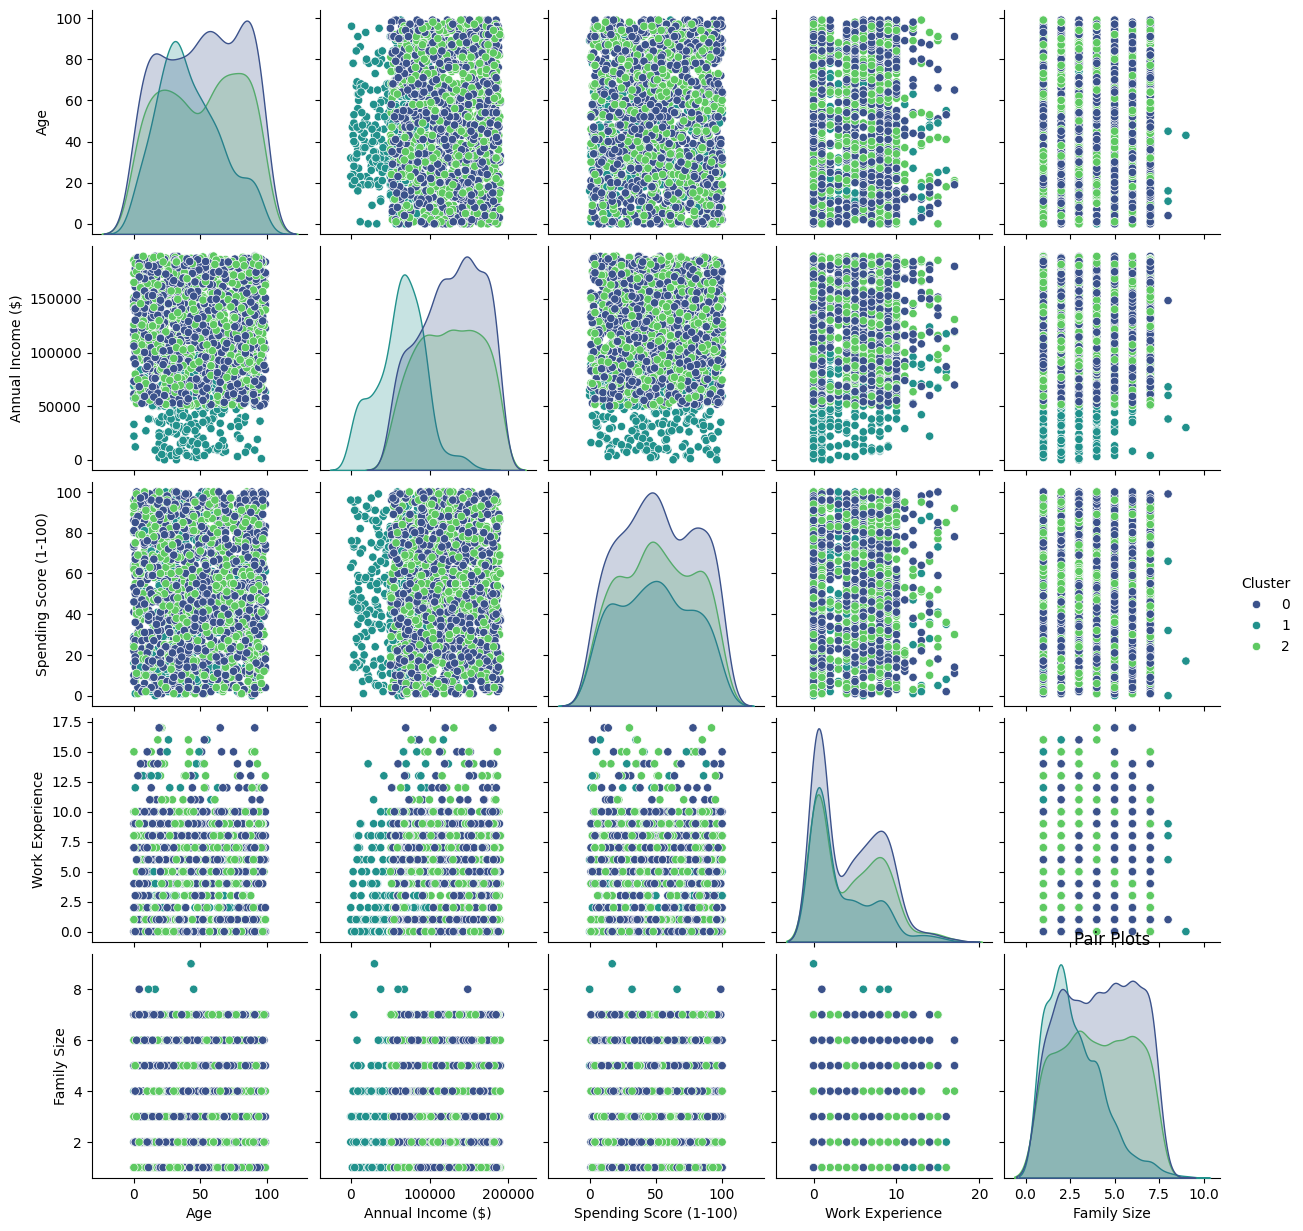

In [30]:
new_data['Cluster'] = new_data['Cluster'].astype('category')

plt.figure(figsize= (8, 5))
sns.pairplot(new_data[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Cluster']], 
             hue = 'Cluster', palette= 'viridis', diag_kind= 'kde' )
plt.title("Pair Plots")
plt.show()


In [35]:
cluster_analysis = new_data.groupby('Cluster').mean()
print("Cluster Characteristics")
print(cluster_analysis)

Cluster Characteristics
          CustomerID    Gender        Age  Annual Income ($)  \
Cluster                                                        
0        1234.738123  1.000000  51.470452      127527.158749   
1         333.691684  0.655172  42.168357       63347.697769   
2        1197.066770  0.000000  50.795031      124498.897516   

         Spending Score (1-100)  Work Experience  Family Size        PCA1  \
Cluster                                                                     
0                     51.900348         4.349942     4.150637  164.596121   
1                     48.912779         3.225152     2.752535 -470.328028   
2                     51.274845         4.442547     4.034161  139.480226   

             PCA2  
Cluster            
0        1.051051  
1       -3.055647  
2        0.930709  


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15324\641456694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_analysis = new_data.groupby('Cluster').mean()


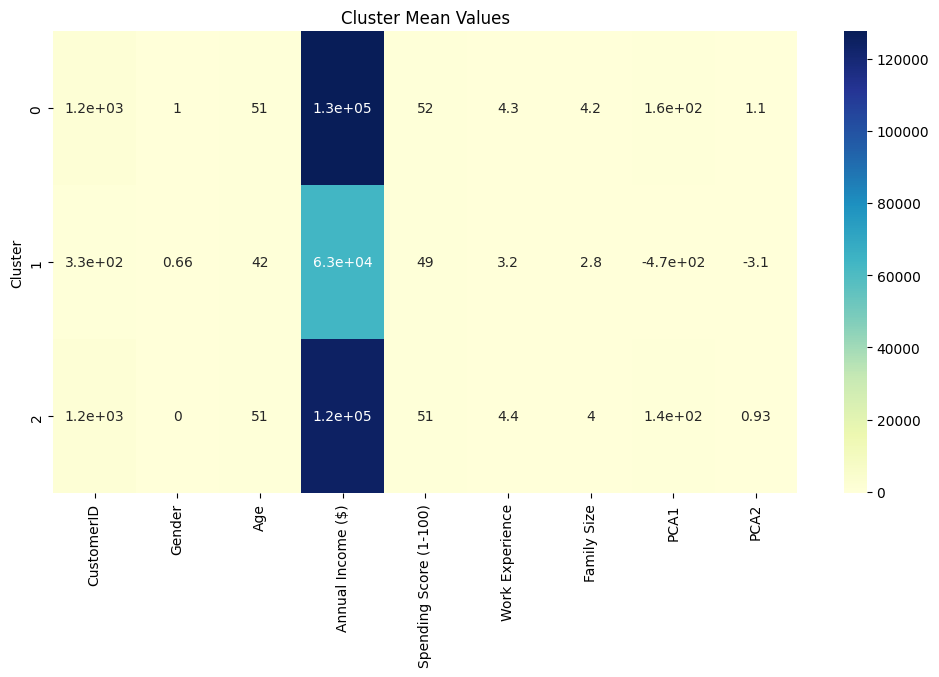

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_analysis, annot = True, cmap='YlGnBu')
plt.title("Cluster Mean Values")
plt.show()

In [37]:
high_spending_score = new_data.groupby('Cluster')[['Spending Score (1-100)', 'Annual Income ($)', 'Age']].mean().sort_values(by = 'Spending Score (1-100)', ascending = False)
print("High Spending People")
print(high_spending_score)

High Spending People
         Spending Score (1-100)  Annual Income ($)        Age
Cluster                                                      
0                     51.900348      127527.158749  51.470452
2                     51.274845      124498.897516  50.795031
1                     48.912779       63347.697769  42.168357


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15324\510304248.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_spending_score = new_data.groupby('Cluster')[['Spending Score (1-100)', 'Annual Income ($)', 'Age']].mean().sort_values(by = 'Spending Score (1-100)', ascending = False)


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15324\218756088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = high_spending_score.index, y = high_spending_score['Spending Score (1-100)'], palette = 'viridis')


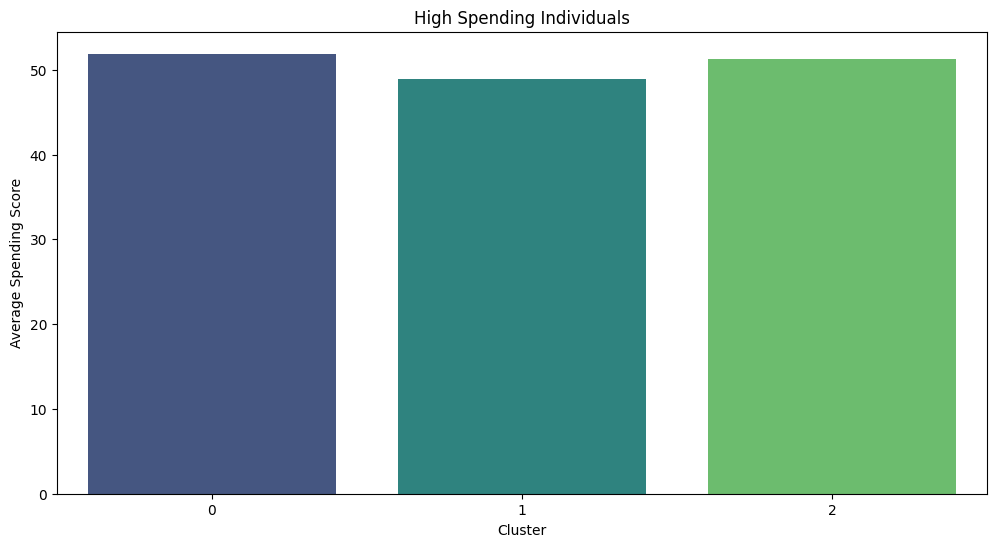

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x = high_spending_score.index, y = high_spending_score['Spending Score (1-100)'], palette = 'viridis')
plt.title("High Spending Individuals")
plt.xlabel("Cluster")
plt.ylabel("Average Spending Score")
plt.show()

In [42]:
age_income_clusters = new_data.groupby('Cluster')[['Age', 'Spending Score (1-100)','Annual Income ($)']].mean().sort_values(by='Annual Income ($)', ascending=False)
print("Age and Income Segments")
print(age_income_clusters)

Age and Income Segments
               Age  Spending Score (1-100)  Annual Income ($)
Cluster                                                      
0        51.470452               51.900348      127527.158749
2        50.795031               51.274845      124498.897516
1        42.168357               48.912779       63347.697769


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15324\141715560.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_clusters = new_data.groupby('Cluster')[['Age', 'Spending Score (1-100)','Annual Income ($)']].mean().sort_values(by='Annual Income ($)', ascending=False)


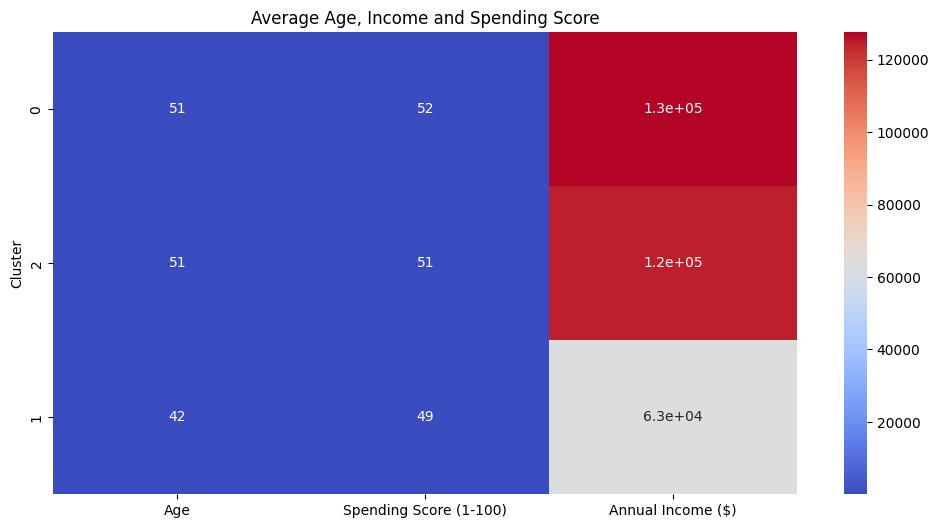

In [43]:
plt.figure(figsize= (12, 6))
sns.heatmap(age_income_clusters, annot = True, cmap = 'coolwarm')
plt.title("Average Age, Income and Spending Score")
plt.show()